In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('Advertising.csv')
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


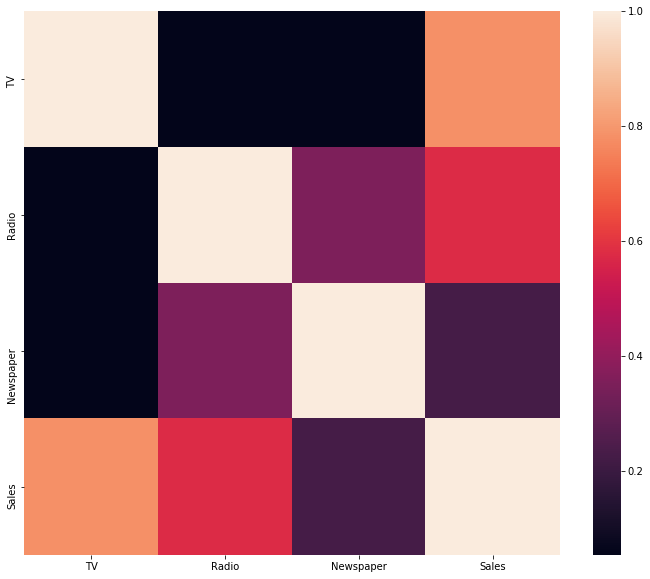

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
plt.subplots(figsize=(12,10)) 
sns.heatmap(data.corr())
plt.show()

c:\users\will\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


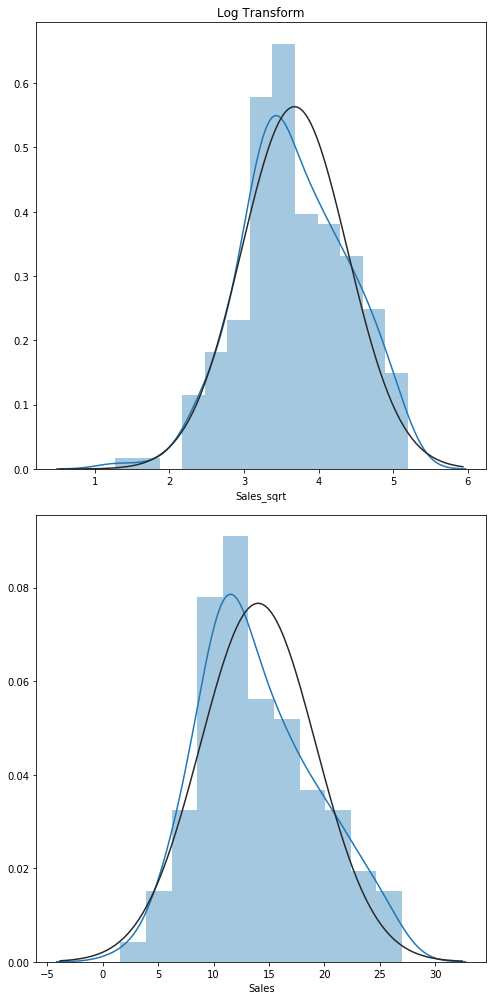

In [39]:
from scipy.stats import norm

data['Sales_sqrt'] = np.sqrt(data['Sales'])

plt.figure(figsize=(7,14))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False)
sns.distplot(data['Sales_sqrt'], fit=norm)
plt.subplot(2, 1, 2)

sns.distplot(data['Sales'], fit=norm)
plt.tight_layout()
plt.show()

c:\users\will\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


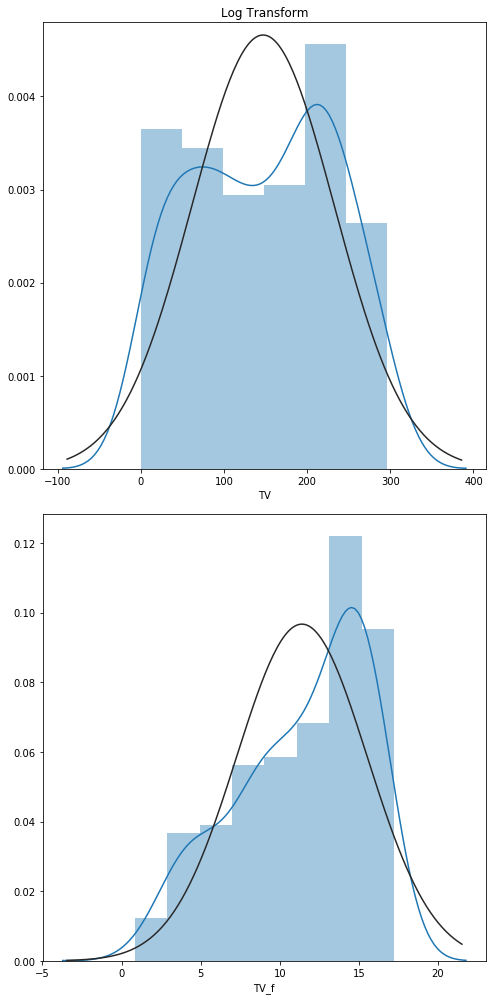

In [40]:
from scipy.stats import norm

data['TV_f'] = np.sqrt(data['TV'])

plt.figure(figsize=(7,14))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False)
sns.distplot(data['TV'], fit=norm)
plt.subplot(2, 1, 2)

sns.distplot(data['TV_f'], fit=norm)
plt.tight_layout()
plt.show()

(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <a list of 10 Patch objects>)

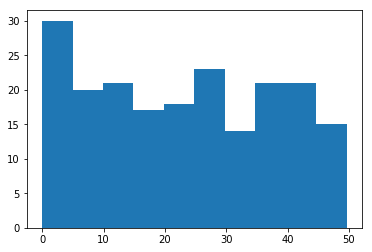

In [7]:
plt.hist(data['Radio'])

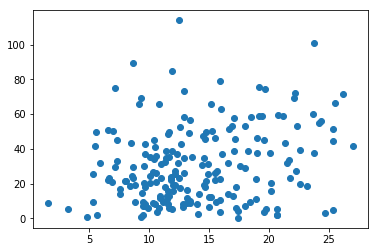

In [8]:
plt.scatter(data['Sales'], data['Newspaper'])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

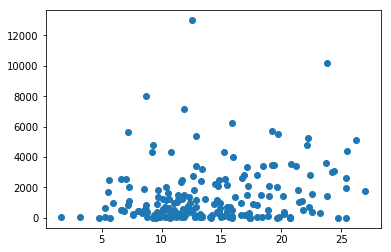

In [9]:
data['News_sqrt'] = np.square(data['Newspaper'])

plt.scatter(data['Sales'], data['News_sqrt'])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

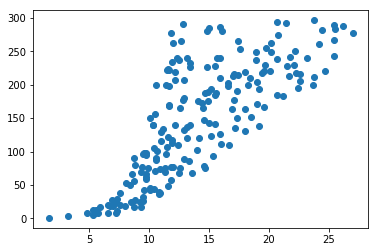

In [10]:
plt.scatter(data['Sales'], data['TV'])
plt.xlabel('')
plt.ylabel('')
plt.title('')

plt.show()

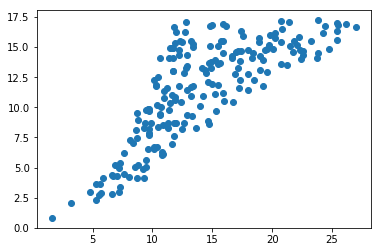

In [26]:
plt.scatter(data['Sales'], data['TV_f'])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

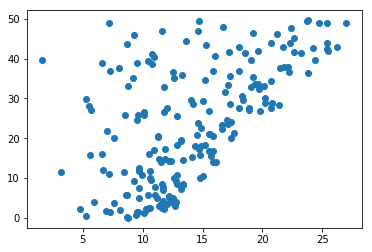

In [12]:
plt.scatter(data['Sales'], data['Radio'])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

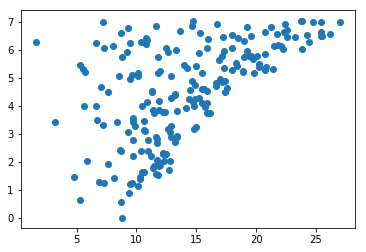

In [51]:
data['Radio_f'] = np.sqrt(data['Radio'])

plt.scatter(data['Sales'], data['Radio_f'])
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

In [55]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales_sqrt'].values.reshape(-1, 1)
X = data[['TV_f', 'Radio']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[0.13819129 0.02451344]]

Intercept: 
 [1.53112021]

R-squared:
0.9358349163222454


## residuals

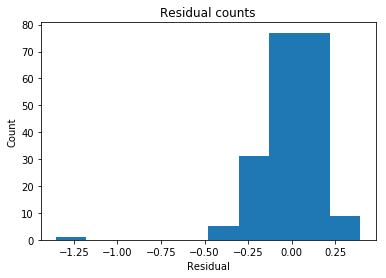

In [58]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales_sqrt']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

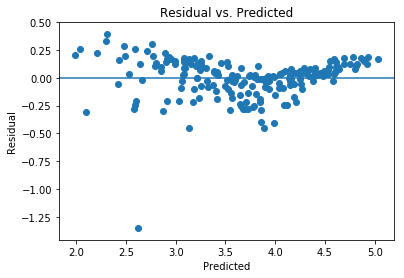

In [59]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

## multicollinearity

In [60]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV_f,Radio
TV_f,1.000,0.029
Radio,0.029,1.000


Square rooting our independent variables showed the best results in homoscedasticity and multivariate normality